# Data Science: Pandas, Seaborn and Scikit-Learn

Based on Machine Learning Practices by Kevin Markham

- How do I use the pandas library to read data into Python?
- How do I use the seaborn library to visualize data?
- What is linear regression, and how does it work?
- How do I train and interpret a linear regression model in scikit-learn?
- What are some evaluation metrics for regression problems?
- How do I choose which features to include in my model?

![title](Img/graphpredict.png)

### Regression Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Finding out more about the dataset

- __TV, Radio, Newspaper:__ Thousands of Dollars spent on ADS
- __Sales:__ Thousands of items sold

Unnamed:0 column seems ID column. We can set this column as our index

In [3]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col='Unnamed: 0')
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
list(data.columns)

['TV', 'radio', 'newspaper', 'sales']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
data.shape

(200, 4)

In [7]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Features
- __TV, Radio, Newspaper:__ Thousands of Dollars spent on ADS

### Response
- __Sales:__ Thousands of items sold

### Regression or Classification Problem?

Response is a continuous value then it is a __Regression Problem__

### Plot the Dataset

/home/dsc/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


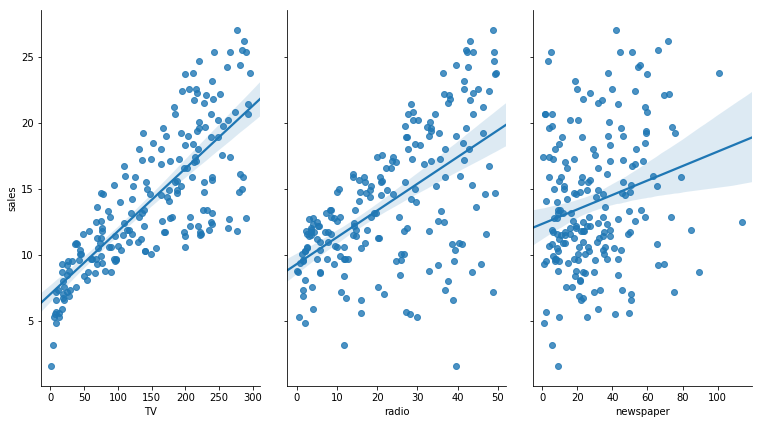

In [8]:
# kind='reg' adds a line of the best fit as well as a 95% confidence band

sns.pairplot(data,x_vars=['TV','radio','newspaper'], y_vars='sales',size=6, aspect=0.6, kind='reg');

We can see that there are:
- __Linear Realtionship__ between __TV and Sales__
- Weak Relationship between Newspaper and Sales

### What kind of Regression models are we going to use?

In this case we are going to try to use a __Linear Regression__

#### Linear Regression

- __Pros__: fast, no tuning required, highly interpretable, well-understood

- __Cons__: unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the model coefficients. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

### Preparing Dataset: X and y using Pandas
- X and y should be NumPy Arrays

    - Features: X matrix
    - Response: y vector
    - Features and Response have to have the same number of rows
    
    
- Pandas is built on top of NumPy

___Then X can be Pandas DataFrame and y van be Pandas Series___

In [9]:
# Pandas DataFrame made of these three columns: TV radio and newspaper

X = data[['TV','radio','newspaper']]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [10]:
# Pandas Series made of sales column
y = data['sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [11]:
X.shape , y.shape

((200, 3), (200,))

### Splitting X and y into Training and Testing datasets

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1) # test_size=0.25 by default

In [13]:
X_train.shape, y_train.shape

((150, 3), (150,))

In [14]:
X_test.shape, y_test.shape

((50, 3), (50,))

### Scikit-Learn Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression
linreg= LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Scikit-Learn Linear Regression Model Coefficients

In [16]:
# Beta 0

linreg.intercept_ 

2.8769666223179318

In [17]:
# Beta 1 Beta 2 ... Beta n

linreg.coef_

array([0.04656457, 0.17915812, 0.00345046])

In [18]:
# pair the feature names with the coefficients
list(zip(['TV','radio','newspaper'], linreg.coef_))

[('TV', 0.04656456787415029),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.003450464711180379)]

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$


How do we interpret the TV coefficient (0.0466)?

- For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.

- Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.

Important notes:

- This is a statement of association, not causation.

- If an increase in TV ad spending was associated with a decrease in sales, $\beta_1$ would be negative

### Predictions

In [19]:
y_pred = linreg.predict(X_test)
y_pred

array([21.70910292, 16.41055243,  7.60955058, 17.80769552, 18.6146359 ,
       23.83573998, 16.32488681, 13.43225536,  9.17173403, 17.333853  ,
       14.44479482,  9.83511973, 17.18797614, 16.73086831, 15.05529391,
       15.61434433, 12.42541574, 17.17716376, 11.08827566, 18.00537501,
        9.28438889, 12.98458458,  8.79950614, 10.42382499, 11.3846456 ,
       14.98082512,  9.78853268, 19.39643187, 18.18099936, 17.12807566,
       21.54670213, 14.69809481, 16.24641438, 12.32114579, 19.92422501,
       15.32498602, 13.88726522, 10.03162255, 20.93105915,  7.44936831,
        3.64695761,  7.22020178,  5.9962782 , 18.43381853,  8.39408045,
       14.08371047, 15.02195699, 20.35836418, 20.57036347, 19.60636679])

### Evaluation

___Mean Absolute Error (MAE):___

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

___Mean Squared Error (MSE):___

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

___Root Mean Squared Error (RMSE):___

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

___R² Score:___

$$R^2=1-\frac{n \times MSE} {\sum_{i=1}^n (y_i - \bar{y} )^2}$$


In [20]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

### Mean Absolute Error MAE

In [21]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
metrics.mean_absolute_error(true, pred)

10.0


10.0

### Mean Squared Error MSE

In [22]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


### Root Mean Squared Error RMSE

In [23]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


### R² Score

In [24]:
# calculate R² Score

from sklearn.metrics import r2_score
r2_score(true,pred)

0.8421052631578947

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Evaluating my Model

#### MAE

In [25]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_pred)

1.0668917082595208

#### MSE

In [26]:
metrics.mean_squared_error(y_test, y_pred)

1.9730456202283375

#### RMSE

In [27]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.4046514230328953

#### R² Score

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9156213613792232

### Improving my Model choosing the rightest features

___Newspaper has not a good correlation with sales___

In [29]:
X= data[['TV','radio']]
y = data['sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1) # test_size=0.25 by default

from sklearn.linear_model import LinearRegression
linreg= LinearRegression()
linreg.fit(X_train,y_train)

y_pred = linreg.predict(X_test)

np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.3879034699382886

___RMSE___ has decreased when we have removed Newspaper from our model because ___Newspaper has not a good correlation with sales___

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9176214942248908

In [31]:
y_pred

array([21.73751851, 16.40451622,  7.64073276, 17.81512707, 18.6140367 ,
       23.75320401, 16.26267467, 13.30968011,  9.11623605, 17.24121988,
       14.37997584,  9.86630093, 17.28107008, 16.70455883, 14.93571851,
       15.47067849, 12.39847009, 17.21737409, 11.18626133, 18.09114847,
        9.34543641, 12.71804909,  8.75327159, 10.468843  , 11.34116649,
       14.98646893,  9.77329331, 19.43186663, 18.31005062, 17.14215851,
       21.62609193, 14.47149683, 16.3536012 , 12.27215653, 19.97488243,
       15.34878155, 13.90760851,  9.99030388, 20.98440888,  7.482353  ,
        3.61019982,  7.1944428 ,  5.99097416, 18.39958364,  8.35858094,
       14.12195436, 15.05074527, 20.38304162, 20.65191677, 19.47457534])

In [32]:
y_test= y_test.reset_index()
y_test.head()

,index,sales
0,59,23.8
1,41,16.6
2,35,9.5
3,103,14.8
4,185,17.6


In [33]:
import seaborn as sns

In [34]:
data = y_test

In [35]:
data['predicted sales'] = y_pred
data.head()

,index,sales,predicted sales
0,59,23.8,21.737519
1,41,16.6,16.404516
2,35,9.5,7.640733
3,103,14.8,17.815127
4,185,17.6,18.614037


In [36]:
data.drop(columns='index',inplace=True)

In [37]:
sns.__version__

'0.9.0'

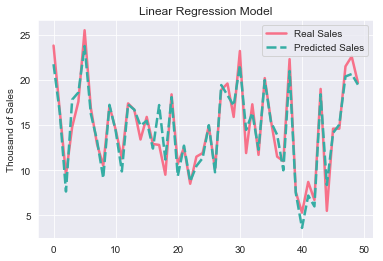

In [39]:
sns.set_style("darkgrid")
sns.lineplot(data=data, palette="husl", linewidth=2.5)
plt.ylabel('Thousand of Sales')
plt.legend(['Real Sales','Predicted Sales'])
plt.title('Linear Regression Model')
plt.savefig('./Img/graphpredict.png');